All'interno di questo script proverò un po' di modelli di Online Machine Learning, utilizzando la libreria River.
Prima di tutto mi soffermerò sul come trattare i miei dati, valori nulli ecc, penserò a delle features da aggiungere.
Poi proverò sicuramente algoritmi di regressione(di vario tipo), poi tipo arima e successivamente proverò con dell'anomaly detection.

Sicuramente potrò provare come primi modelli il Nowcasting, questo è uno speciale caso del forecasting che consiste nel predirre il prossimo valore nella time series.



In ogni caso devo ragionare come se non avessi il dataset completo, quindi sicuramente devo prepararmi per ogni evenienza!

In [55]:
from river import compose

from river import metrics
import matplotlib.pyplot as plt
import datetime as dt
from river import linear_model
from pprint import pprint
from river import preprocessing
import pandas as pd

In [10]:
from river import stream

dataset = stream.iter_csv("C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv")


In [24]:
from river import compose

X_y = stream.iter_csv(
    'C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv',
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)

x,y = next(X_y)
x,y

({'Date': datetime.datetime(2004, 3, 10, 0, 0), 'Hour': 18}, 1360.0)

In [33]:
x,y = next(X_y)
x,y

({'Date': datetime.datetime(2004, 3, 11, 0, 0), 'Hour': 3}, 1010.0)

In [34]:
import calendar

def get_month(x):
    x['month'] = x['Date'].month
    return {
        
        calendar.month_name[month]: month == x['Date'].month
        for month in range(1, 13)
    }


In [35]:
def get_month(x):
    x['month'] = x['Date'].month
    return {
        
        calendar.month_name[month]: month == x['Date'].month
        for month in range(1, 13)
    }
get_month(x)

{'January': False,
 'February': False,
 'March': True,
 'April': False,
 'May': False,
 'June': False,
 'July': False,
 'August': False,
 'September': False,
 'October': False,
 'November': False,
 'December': False}

In [39]:
def get_ordinal_date(x):
    x['ordinal_date'] = x['Date'].toordinal()
    #x['month'] = x['Date'].month
    x['day'] = x['Date'].day

    return x


model = compose.Pipeline(
    compose.FuncTransformer(get_month),
    #compose.Select('day'),
    #preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)


In [42]:
x,y = next(X_y)
pprint(model.transform_one(x))

{'April': False,
 'August': False,
 'December': False,
 'February': False,
 'January': False,
 'July': False,
 'June': False,
 'March': True,
 'May': False,
 'November': False,
 'October': False,
 'September': False}


In [43]:
from river import metrics
import matplotlib.pyplot as plt


def evaluate_model(model,a,b):

    metric = metrics.Rolling(metrics.MAE(), 12)

    dates = []
    y_trues = []
    y_preds = []

    for x, y in X_y:

        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x, y)

        # Update the error metric
        metric.update(y, y_pred)

        # Store the true value and the prediction
        dates.append(x['Date'])
        y_trues.append(y)
        y_preds.append(y_pred)

    # Plot the results
    fig, ax = plt.subplots(figsize=(a, b))
    ax.grid(alpha=0.75)
    ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=0.8, label='Ground truth')
    ax.plot(dates, y_preds, lw=3, color='#e74c3c', alpha=0.8, label='Prediction')
    ax.legend()
    ax.set_title(metric)

In [44]:
evaluate_model(model)

TypeError: evaluate_model() missing 2 required positional arguments: 'a' and 'b'

In [45]:
{'April': False,
 'August': False,
 'December': False,
 'February': False,
 'January': False,
 'July': False,
 'June': False,
 'March': True,
 'May': False,
 'November': False,
 'October': False,
 'September': False}

{'April': False,
 'August': False,
 'December': False,
 'February': False,
 'January': False,
 'July': False,
 'June': False,
 'March': True,
 'May': False,
 'November': False,
 'October': False,
 'September': False}

In [48]:
X_y = stream.iter_csv(
    '/home/giodefa/Desktop/Unimib/Data Science/Tesi/Script/co2_streaming/Project_data_2021_2022 (TRAINSET)(1).csv',
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)


def get_ordinal_date(x):
    x['ordinal_date'] = x['Date'].toordinal()
    x['month'] = x['Date'].month
    x['day'] = x['Date'].day

    return x

def get_month(x):
    return {
        calendar.month_name[month]: month == x['Date'].month
        for month in range(1, 13)
    }


model = compose.Pipeline(
    
    compose.TransformerUnion(
        compose.FuncTransformer(get_ordinal_date),
        compose.FuncTransformer(get_month)    
    ),
    compose.Select('ordinal_date','day','month'),
    preprocessing.StandardScaler(),
    ('lin_reg',linear_model.LinearRegression())
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model,15,5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/giodefa/Desktop/Unimib/Data Science/Tesi/Script/co2_streaming/Project_data_2021_2022 (TRAINSET)(1).csv'

In [1482]:
model.regressor['lin_reg'].weights

{'ordinal_date': -0.621186674356194,
 'day': -0.2032386919819975,
 'month': 0.05624687431091594}

C:\Users\giode\PycharmProjects\Script_Tesi_new\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


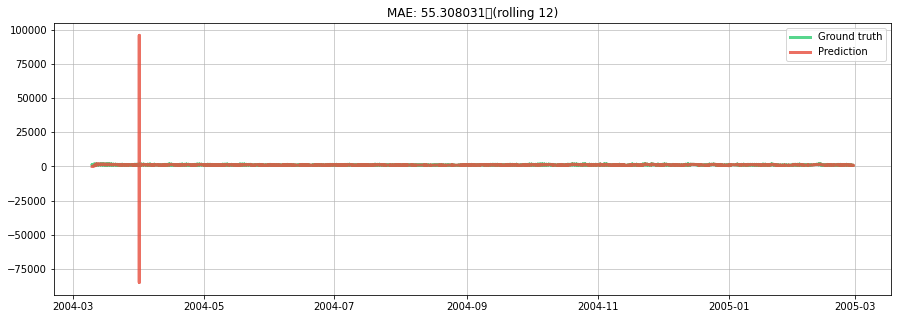

In [51]:
from river import optim


X_y = stream.iter_csv(
    "C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv",
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)


def get_ordinal_date(x):
    x['ordinal_date'] = x['Date'].toordinal()
    x['month'] = x['Date'].month
    x['day'] = x['Date'].day

    return x

def get_month(x):
    return {
        calendar.month_name[month]: month == x['Date'].month
        for month in range(1, 13)
    }


model = compose.Pipeline(
    
    compose.TransformerUnion(
        compose.FuncTransformer(get_ordinal_date),
        compose.FuncTransformer(get_month)    
    ),
    compose.Select('ordinal_date','day','month'),
    preprocessing.StandardScaler(),
    ('lin_reg',linear_model.LinearRegression())
)

evaluate_model(model,15,5)

In [53]:
from river import datasets
from river import metrics
from river import time_series


dataset = stream.iter_csv(
    "C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv",
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)


def get_ordinal_date(x):
    x['ordinal_date'] = x['Date'].toordinal()
    x['month'] = x['Date'].month
    x['day'] = x['Date'].day

extract_features = compose.TransformerUnion(
    get_ordinal_date
)

model = (
    extract_features |
    compose.Select('ordinal_date','day','month')|
    time_series.SNARIMAX(
        p=0,
        d=0,
        q=0,
        m=12,
        sp=3,
        sq=6,
        regressor=(
            preprocessing.StandardScaler() |
            linear_model.LinearRegression()
        )
    )
)

metric = metrics.Rolling(metrics.MAE(), 12)

for x, y in dataset:
    y_pred = model.forecast(horizon=1, xs=[x])
    model = model.learn_one(x, y)
    metric = metric.update(y, y_pred[0])




TypeError: 'NoneType' object is not iterable

In [56]:
from river import stream

dataset = stream.iter_csv("C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv")
dataset_stream = pd.read_csv("C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv")
dataset_stream 


,Date,Hour,CO
0,2004-03-10,18,1360.0
1,2004-03-10,19,1292.0
2,2004-03-10,20,1402.0
3,2004-03-10,21,1376.0
4,2004-03-10,22,1272.0
...,...,...,...
8521,2005-02-28,19,938.0
8522,2005-02-28,20,939.0
8523,2005-02-28,21,827.0
8524,2005-02-28,22,776.0


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_data(drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(dataset_stream['CO'], label='Stream')
    ax2.grid(axis='y')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

Change detected at index {'Date': datetime.datetime(2004, 3, 25, 0, 0), 'Hour': 9}
Change detected at index {'Date': datetime.datetime(2004, 4, 2, 0, 0), 'Hour': 9}
Change detected at index {'Date': datetime.datetime(2004, 4, 10, 0, 0), 'Hour': 9}
Change detected at index {'Date': datetime.datetime(2004, 4, 15, 0, 0), 'Hour': 17}
Change detected at index {'Date': datetime.datetime(2004, 4, 21, 0, 0), 'Hour': 1}
Change detected at index {'Date': datetime.datetime(2004, 4, 27, 0, 0), 'Hour': 17}
Change detected at index {'Date': datetime.datetime(2004, 5, 4, 0, 0), 'Hour': 9}
Change detected at index {'Date': datetime.datetime(2004, 5, 23, 0, 0), 'Hour': 1}
Change detected at index {'Date': datetime.datetime(2004, 5, 27, 0, 0), 'Hour': 1}
Change detected at index {'Date': datetime.datetime(2004, 5, 31, 0, 0), 'Hour': 1}
Change detected at index {'Date': datetime.datetime(2004, 6, 6, 0, 0), 'Hour': 17}
Change detected at index {'Date': datetime.datetime(2004, 6, 20, 0, 0), 'Hour': 1}
Chan

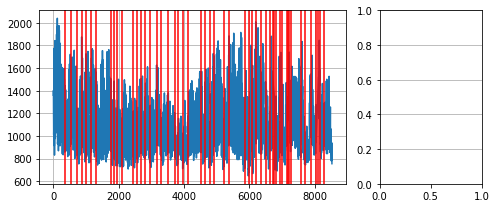

In [59]:
from river import drift


dataset = stream.iter_csv(
    "C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv",
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)

dataset = stream.iter_csv(
    "C:\\Users\\giode\\PycharmProjects\\Script_Tesi_new\\Script\\co2_streaming\\Project_data_2021_2022 (TRAINSET)(1).csv",
    converters={
        'CO': float,
        'Hour': int
    },
    parse_dates={'Date': '%Y-%m-%d'},
    target= 'CO',
    
)


drift_detector = drift.ADWIN()
drifts = []
a = 0
for i, val in dataset:
    a +=1
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(a)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(drifts)